<a href="https://colab.research.google.com/github/lim4373/DL/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/archive (1).zip"

/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor


### 1. 원핫 인코딩
- 0: Tumor
- 1: Normal

In [16]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

### 2. 리스트 만들기
- data
- paths
- result

In [17]:
data = []
paths = []
result = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [18]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [19]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [21]:
result = np.array(result)
result = result.reshape(139,2)

In [22]:
result.shape

(139, 2)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=2024)

In [57]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_8 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)       

In [58]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 3s 251ms/step - loss: 39.7082 - accuracy: 0.6126 - val_loss: 35.8373 - val_accuracy: 0.6429
Epoch 2/30
3/3 [==============================] - 0s 109ms/step - loss: 8.6311 - accuracy: 0.7387 - val_loss: 20.1609 - val_accuracy: 0.6071
Epoch 3/30
3/3 [==============================] - 0s 93ms/step - loss: 3.3943 - accuracy: 0.7658 - val_loss: 22.1711 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 0s 94ms/step - loss: 1.4280 - accuracy: 0.8559 - val_loss: 16.4278 - val_accuracy: 0.6429
Epoch 5/30
3/3 [==============================] - 0s 93ms/step - loss: 1.5442 - accuracy: 0.8919 - val_loss: 7.6787 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 0s 89ms/step - loss: 1.3410 - accuracy: 0.9099 - val_loss: 7.1343 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 0s 89ms/step - loss: 0.6792 - accuracy: 0.9550 - val_loss: 10.6229 - val_accuracy: 0.6429
Epoch 8/30
3/3 [===

In [59]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 36ms/step - loss: 4.1806 - accuracy: 0.6786


[4.180588245391846, 0.6785714030265808]

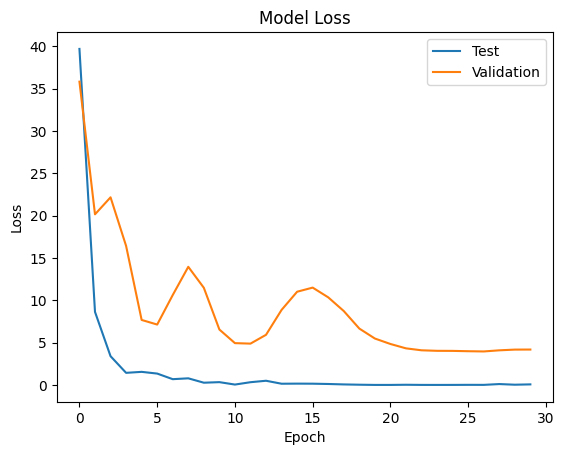

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [61]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


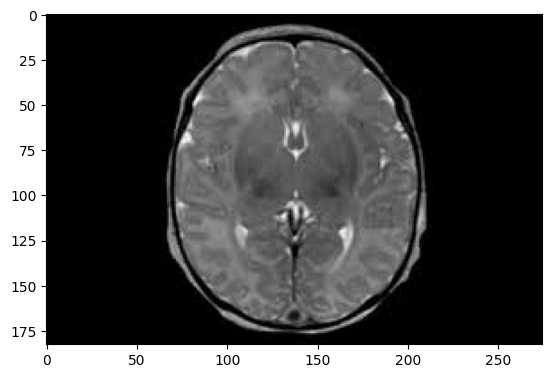

In [62]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/brain_tumor_dataset/no/12 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

96.1024522781372% Confidence This Is A No, Its not a tumor


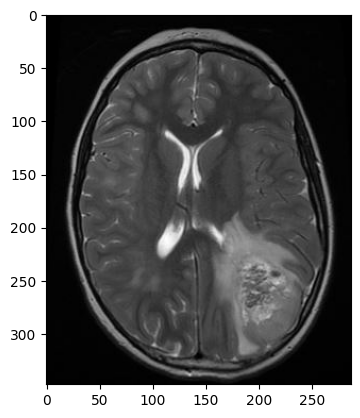

In [63]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

### resnet

In [73]:
from tensorflow.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications.resnet import preprocess_input
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3), pooling='avg')

In [74]:
model_1 = Sequential([
    base_model,
    Dense(2, activation='softmax')
])
model_1.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_13 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 23538690 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [75]:
history2 = model_1.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 39s 3s/step - loss: 0.9265 - accuracy: 0.6486 - val_loss: 5.8424 - val_accuracy: 0.6786
Epoch 2/30
3/3 [==============================] - 0s 177ms/step - loss: 0.4779 - accuracy: 0.8649 - val_loss: 17.0944 - val_accuracy: 0.4643
Epoch 3/30
3/3 [==============================] - 0s 176ms/step - loss: 0.1127 - accuracy: 0.9640 - val_loss: 30.2723 - val_accuracy: 0.4286
Epoch 4/30
3/3 [==============================] - 0s 176ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 28.4868 - val_accuracy: 0.3929
Epoch 5/30
3/3 [==============================] - 0s 176ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 22.7916 - val_accuracy: 0.4643
Epoch 6/30
3/3 [==============================] - 0s 176ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 18.7299 - val_accuracy: 0.4643
Epoch 7/30
3/3 [==============================] - 0s 174ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 15.8698 - val_accuracy: 0.4286
Epoch 8/30
3/3 [

In [76]:
model_1.evaluate(x_test,y_test)

1/1 [==============================] - 0s 81ms/step - loss: 1.4306 - accuracy: 0.8214


[1.4305957555770874, 0.8214285969734192]

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

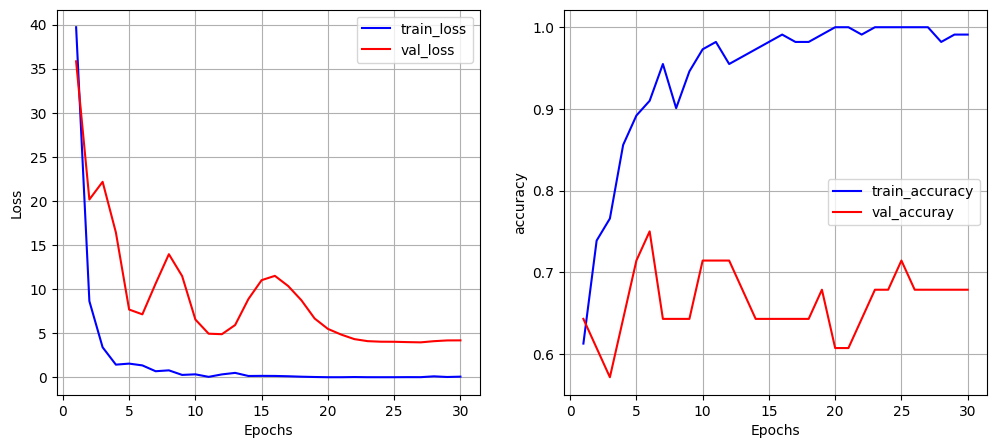

In [85]:
history.history.keys()
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig=plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color = 'blue',label='train_loss')
ax1.plot(epochs, val_loss,color='red', label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,accuracy,color = 'blue',label='train_accuracy')
ax2.plot(epochs, val_accuracy,color='red', label='val_accuray')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.grid()
ax2.legend()


plt.show()

81.80171251296997% Confidence This Is Its a Tumor


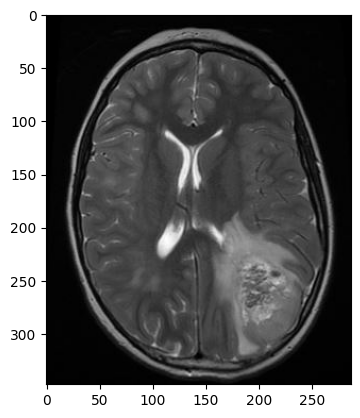

In [87]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab Notebooks/공부/ct medical image/brain_tumor/brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))